In [1]:
import pandas as pd
import numpy as np
import biosppy
import biosppy.signals 
import scipy
from scipy.signal import savgol_filter
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = scipy.signal.lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scipy.signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = scipy.signal.lfilter(b, a, data)
    return y

def bandPassfilter(signal):
 
 fs=55
 lowcut=0.5
 highcut=25
 y = butter_lowpass_filter(signal,22,55, order=5)
 y = butter_highpass_filter(signal,0.005,55, order=5)
 nyq=0.5* fs
 low=lowcut/nyq
 high=highcut/nyq

 order=4
 b,a =scipy.signal.butter(order,[low,high],'bandpass',analog= False)
 y=scipy.signal.filtfilt(b,a,signal,axis=0)
 return y 

In [3]:
grp = pd.read_excel('C:\\Users\\YOGHES WARAN\\OneDrive\\Desktop\\New folder\\part1_ppg.xlsx');

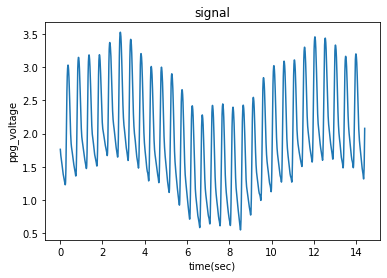

In [4]:
no=np.array(grp['time'])

n=0.5*np.sin(0.1*2*np.pi*no)

p=np.array(grp['ppg'])+n
signal=p[0:1800]
p=p[0:1800]
t=grp['time']
t=t[0:1800]
plt.plot(t,p)
plt.ylabel('ppg_voltage')
plt.xlabel('time(sec)')
plt.title("signal")
plt.show()

In [ ]:

##filtered_signal=bandPassfilter(p)
##filtered_signal=filtered_signal
##p=filtered_signal+0.5
##plt.plot(t,p)

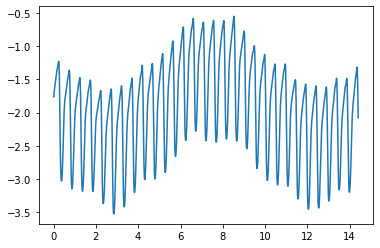

In [5]:
p=-p
plt.plot(t,p)
p=-p

[[  45  108  170  231  293  355  416  477  597  659  720  780  839  957
  1021 1081 1141 1201 1319 1381 1444 1505 1566 1626 1685 1799]]
26
14


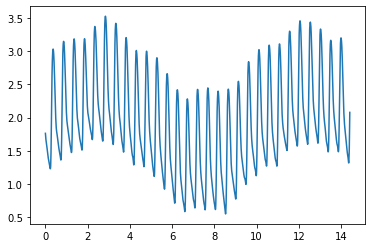

In [6]:
plt.plot(t,p)
peak=biosppy.signals.ecg.christov_segmenter(signal=p, sampling_rate=125)
peak=np.array(peak)
print(peak)
n=peak.shape[1]
print(n)
print(int((89-30)/4))

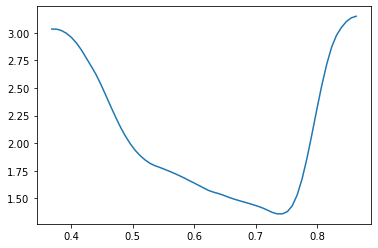

In [7]:
a=p[peak[0][0]:peak[0][1]]
plt.plot(t[peak[0][0]:peak[0][1]],a)


Text(0.5, 1.0, 'signal')

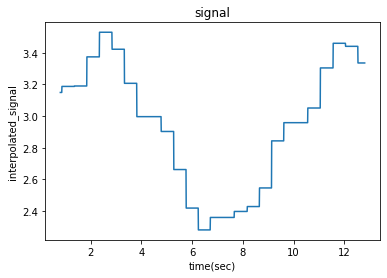

In [8]:
mean=np.zeros((1,8))
for i in range(0,n-1):
 mean[0][0]=(p[peak[0][i]]+p[peak[0][i+1]])/2
 
 mean[0][1]=(mean[0][1]+p[peak[0][i]])/2

 mean[0][2]=(mean[0][0]+p[peak[0][i+1]])/2
    
 mean[0][3]=(mean[0][1]+p[peak[0][i]])/2

 mean[0][4]=(mean[0][2]+p[peak[0][i+1]])/2
    
 mean[0][5]=(mean[0][1]+mean[0][0])/2

 mean[0][6]=(mean[0][2]+mean[0][0])/2
 
 n1=int((p[peak[0][i+1]]-p[peak[0][i]])/4)
 
 for j in range(peak[0][i],peak[0][i]+n1):
        p[j]=p[peak[0][i]]
 
 for j in range(peak[0][i]+n1,peak[0][i]+2*n1):
        p[j]=mean[0][1]
 
 for j in range(peak[0][i]+2*n1,peak[0][i]+3*n1):
        p[j]=mean[0][0]
 
 for j in range(peak[0][i]+3*n1,peak[0][i]+4*n1):
        p[j]=mean[0][2]
 """
 for j in range(peak[0][i]+4*n1,peak[0][i]+5*n1):
        p[j]=mean[0][0]
        
 for j in range(peak[0][i]+5*n1,peak[0][i]+6*n1):
        p[j]=mean[0][6]

 for j in range(peak[0][i]+6*n1,peak[0][i]+7*n1):
        p[j]=mean[0][2]
 
 for j in range(peak[0][i]+7*n1,peak[0][i]+8*n1):
        p[j]=mean[0][4]
 """
 for j in range(peak[0][i]+8*n1,peak[0][i+1]):
        p[j]=p[peak[0][i+1]]
 
plt.plot(t[100:1600],p[100:1600])    
plt.ylabel('interpolated_signal')
plt.xlabel('time(sec)')
plt.title("signal")

Text(0.5, 1.0, 'signal')

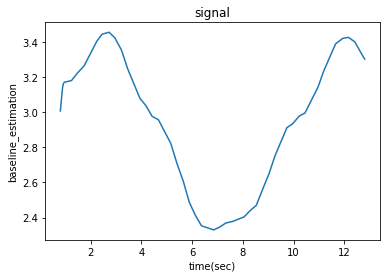

In [9]:
yhat = savgol_filter(p, 151, 1)
plt.plot(t[100:1600],yhat[100:1600])
plt.ylabel('baseline_estimation')
plt.xlabel('time(sec)')
plt.title("signal")

In [10]:
pro_signal=signal-yhat+3


Text(0.5, 1.0, 'signal')

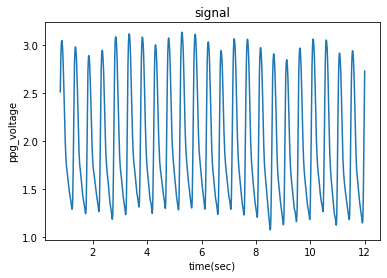

In [11]:
plt.plot(t[100:1500],pro_signal[100:1500])
plt.ylabel('ppg_voltage')
plt.xlabel('time(sec)')
plt.title("signal")

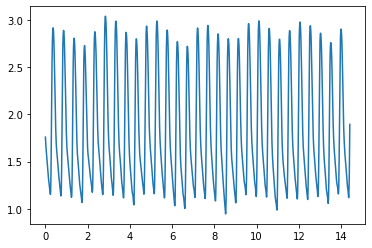

In [12]:
pro_signal=pro_signal+3
pure_signal=np.array(grp['ppg'])
pure_signal=pure_signal[0:1800]
plt.plot(t,pure_signal)

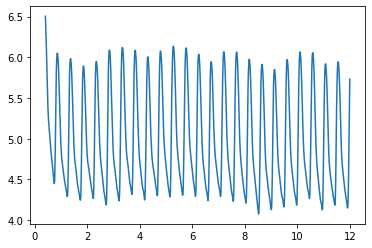

In [13]:
plt.plot(t[50:1500],pro_signal[50:1500])

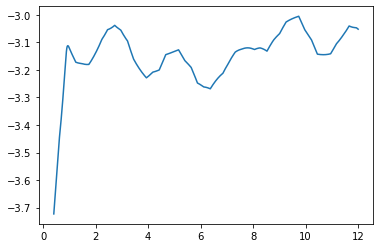

In [14]:
plt.plot(t[50:1500],pure_signal[50:1500]-pro_signal[50:1500])

In [15]:
error=np.sum(pure_signal[50:1500]-pro_signal[50:1500])/np.sum(pure_signal[50:1500])
print(error*100)

-172.15175435263507


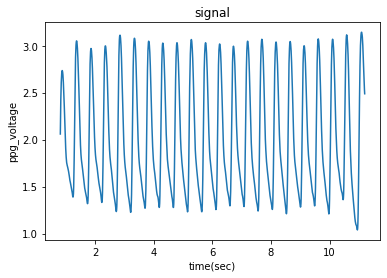

In [44]:
filtered_signal=bandPassfilter(pro_signal[100:1400])
filtered_signal=filtered_signal
p=filtered_signal+2
plt.ylabel('ppg_voltage')
plt.xlabel('time(sec)')
plt.title("signal")
plt.plot(t[100:1400],p)

In [16]:
error=np.sum(100*pure_signal[100:1500]-100*p)/np.sum(100*pure_signal[50:1500])
print (error*100)

ValueError: operands could not be broadcast together with shapes (1400,) (1800,) 

In [ ]:
print(1)